Load Libraries & Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic test dataset
df = pd.read_csv(r"D:\garbage\following_chatgpt\git\datasets\titanic\test.csv")

# Display basic info
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Basic Dataset Overview

In [2]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Data types & null values
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nDescribe:")
print(df.describe(include="all"))


Rows, Columns: (418, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Describe:
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN      

Missing Value Check

In [3]:
# Count missing values per column
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])


Age       86
Fare       1
Cabin    327
dtype: int64


Filter Examples

In [4]:
# Age > 60
older_passengers = df[df["Age"] > 60]
print("Passengers older than 60:")
print(older_passengers[["Name", "Age"]])

# Female passengers in first class
female_first_class = df[(df["Sex"] == "female") & (df["Pclass"] == 1)]
print("\nFemale passengers in first class:")
print(female_first_class[["Name", "Sex", "Pclass"]])

Passengers older than 60:
                                                  Name   Age
2                            Myles, Mr. Thomas Francis  62.0
13                                Howard, Mr. Benjamin  63.0
81                                  Straus, Mr. Isidor  67.0
96   Cavendish, Mrs. Tyrell William (Julia Florence...  76.0
114             Straus, Mrs. Isidor (Rosalie Ida Blun)  63.0
142                         Ryerson, Mr. Arthur Larned  61.0
152                                 Storey, Mr. Thomas  60.5
179  Compton, Mrs. Alexander Taylor (Mary Eliza Ing...  64.0
193                                  Lingane, Mr. John  61.0
236                           Warren, Mr. Frank Manley  64.0
305  Crosby, Mrs. Edward Gifford (Catherine Elizabe...  64.0

Female passengers in first class:
                                                  Name     Sex  Pclass
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female       1
14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female   

Sorting Examples

In [5]:
# Top 5 fares
top_fares = df.sort_values(by="Fare", ascending=False).head(5)
print(top_fares[["Name", "Fare"]])


                                                  Name      Fare
343  Cardeza, Mrs. James Warburton Martinez (Charlo...  512.3292
69                 Fortune, Mrs. Mark (Mary McDougald)  263.0000
53                          Fortune, Miss. Ethel Flora  263.0000
59                         Chaudanson, Miss. Victorine  262.3750
64                         Ryerson, Master. John Borie  262.3750


Age Distribution Plot

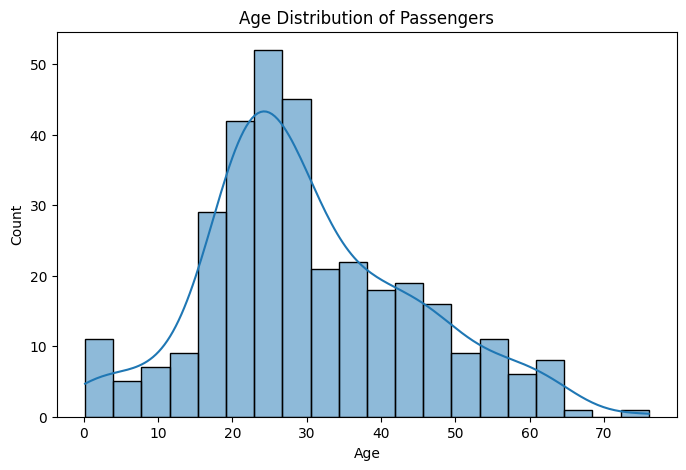

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Fare vs Passenger Class

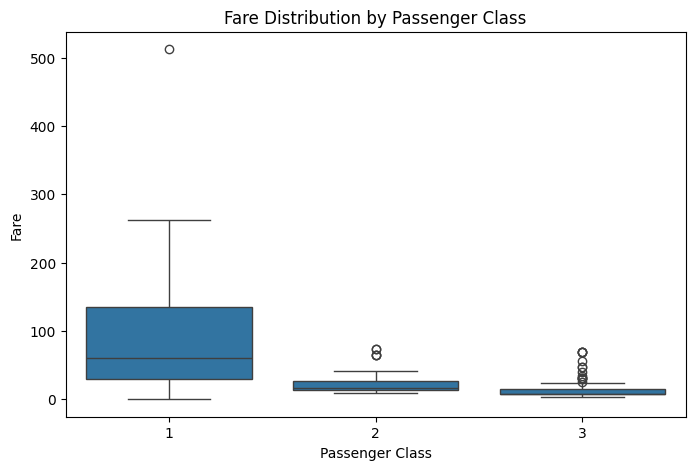

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


Sex Distribution

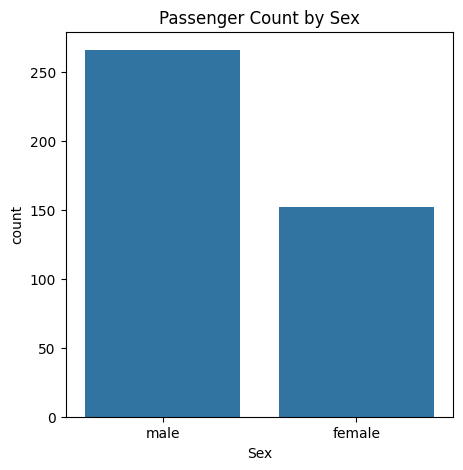

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x="Sex", data=df)
plt.title("Passenger Count by Sex")
plt.show()


fare by age


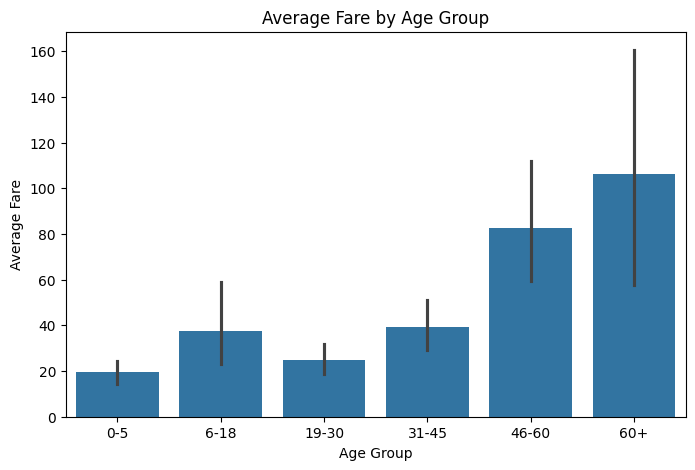

In [13]:
# Create age bins
age_bins = [0, 5, 18, 30, 45, 60, 100]
age_labels = ["0-5", "6-18", "19-30", "31-45", "46-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Plot average fare per age group
plt.figure(figsize=(8,5))
sns.barplot(x="AgeGroup", y="Fare", data=df, estimator="mean")
plt.title("Average Fare by Age Group")
plt.ylabel("Average Fare")
plt.xlabel("Age Group")
plt.show()
